<span style="font-size: 35px; color: Green;font-family: 'Times New Roman', Times, serif;">Data Understanding.</span>
<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">Read CSV into a Pandas object</span>

In [83]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import warnings


data = pd.read_csv('data/coupons.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

<span style="font-size: 35px; color: Green;font-family: 'Times New Roman', Times, serif;">Investigate the dataset.</span>
<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">Rename Columns</span> 

In [84]:
data=data.rename(columns={'passanger': 'passenger', "Bar":"bar", "CoffeeHouse":"coffee_house","CarryAway":"carry_away", "RestaurantLessThan20":"restaurant_under_20"
                          ,"Restaurant20To50":"restaurant_20_50", "Y":"coupon_accepted"})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   destination          12684 non-null  object
 1   passenger            12684 non-null  object
 2   weather              12684 non-null  object
 3   temperature          12684 non-null  int64 
 4   time                 12684 non-null  object
 5   coupon               12684 non-null  object
 6   expiration           12684 non-null  object
 7   gender               12684 non-null  object
 8   age                  12684 non-null  object
 9   maritalStatus        12684 non-null  object
 10  has_children         12684 non-null  int64 
 11  education            12684 non-null  object
 12  occupation           12684 non-null  object
 13  income               12684 non-null  object
 14  car                  108 non-null    object
 15  bar                  12577 non-null  object
 16  coff

<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">Check for Null/NaN rows</span>


In [85]:
data.isnull().sum()

destination                0
passenger                  0
weather                    0
temperature                0
time                       0
coupon                     0
expiration                 0
gender                     0
age                        0
maritalStatus              0
has_children               0
education                  0
occupation                 0
income                     0
car                    12576
bar                      107
coffee_house             217
carry_away               151
restaurant_under_20      130
restaurant_20_50         189
toCoupon_GEQ5min           0
toCoupon_GEQ15min          0
toCoupon_GEQ25min          0
direction_same             0
direction_opp              0
coupon_accepted            0
dtype: int64

<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">Check for duplicate rows</span>

In [86]:
data.loc[data.duplicated()]

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,coffee_house,carry_away,restaurant_under_20,restaurant_20_50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,coupon_accepted
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,...,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,...,never,less1,1~3,never,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0


<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">Decide what to do about your missing data </span>
<ul style="font-size: 17px; color: black; font-family: 'Times New Roman', Times, serif; list-style-type: disc; padding-left: 0; margin-left: 25px;">
  <li>We will drop car column as it has 99% of empty values relative to the whole dataset</li>
  <li>We will drop all duplicated rows</li>
</ul>

In [87]:
# print(data["car"].value_counts().idxmax())

CarNAPerct = (data['car'].isnull().sum() / data.shape[0])*100 
print(f"Car null values are {CarNAPerct:.2f}% of the whole dataset. Huge chunk of null data, drop column")

barNAPerct = (data['bar'].isnull().sum() / data.shape[0])*100 
print(f"bar null values are {barNAPerct:.2f}% of the whole dataset.Manageable null data, drop rows")

CoffeeHouseNAPerct = (data['coffee_house'].isnull().sum() / data.shape[0])*100 
print(f"Coffee House null values are {CoffeeHouseNAPerct:.2f}% of the whole dataset. Manageable null data, drop rows")

CarryAwayNAPerct = (data['carry_away'].isnull().sum() / data.shape[0])*100 
print(f"CarryAway null values are {CarryAwayNAPerct:.2f}% of the whole dataset. Manageable null data, drop rows")

RestLT20NAPerct = (data['restaurant_under_20'].isnull().sum() / data.shape[0])*100 
print(f"Restaurant <20 null values are {RestLT20NAPerct:.2f}% of the whole dataset. Manageable null data, drop rows")

Rest20_50NAPerct = (data['restaurant_20_50'].isnull().sum() / data.shape[0])*100 
print(f"Restaurant 20-50 null values are {Rest20_50NAPerct:.2f}% of the whole dataset. Manageable null data, drop rows")

Car null values are 99.15% of the whole dataset. Huge chunk of null data, drop column
bar null values are 0.84% of the whole dataset.Manageable null data, drop rows
Coffee House null values are 1.71% of the whole dataset. Manageable null data, drop rows
CarryAway null values are 1.19% of the whole dataset. Manageable null data, drop rows
Restaurant <20 null values are 1.02% of the whole dataset. Manageable null data, drop rows
Restaurant 20-50 null values are 1.49% of the whole dataset. Manageable null data, drop rows


In [88]:
data= data.drop(columns=['car'])  # Drop Car Column  
data = data.dropna(subset=['bar', 'coffee_house', 'carry_away', 'restaurant_under_20','restaurant_20_50']) # Drop all rows that have empty values for bar, CoffeeHouse, CarryAway,restaurant_under_$20,Restaurant20To50
data.shape

(12079, 25)

In [89]:
data= data.drop_duplicates() # Drop Duplicates
data.loc[data.duplicated()]
data.shape

(12007, 25)

<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">Convert necessary columns from object to integer</span>

In [90]:
# Below, I am converting age to a number
def convert_age(age):
    if age == 'below21':
        return 21
    elif age == '50plus':
        return 51
    else:
        return int(age)

# Apply the function to the 'age' column
data['age'] = data['age'].apply(convert_age)
data['age']=pd.to_numeric(data['age'],errors ='coerce').astype('Int64') # Convert Age to Integer

In [91]:
# Below, I am converting the time from an object datatype to an integer datatype in order to find its correlation with coupon acceptance

import pandas as pd
from datetime import datetime
def to_24_hour_format(time_str):
    return datetime.strptime(time_str, '%I%p').hour

# Apply the conversion function to the 'time' column
data['time'] = data['time'].apply(to_24_hour_format)

<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">What proportion of the total observations chose to accept the coupon?</span>  

In [92]:
print(f"Proportion of total accepted coupons is {data["coupon_accepted"].mean()}")

Proportion of total accepted coupons is 0.5684184225868244


<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">Use a bar plot to visualize the coupon column</span> 

In [187]:
coupon_cnts = data["coupon"].value_counts().reset_index()
coupon_cnts.columns = ["Coupon type", "Count of coupons"]  # Rename columns for clarity

# Plotting with Plotly Express
fig = px.bar(coupon_cnts, x="Coupon type", y="Count of coupons", title="Coupon Counts", color="Coupon type") 
fig.update_layout(width=700, height =500, title ="Coupon Column Visualization") 
fig.show() 
fig.write_image("images/CouponViz.png")

<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">Use a histogram to visualize the temperature column.</span> 

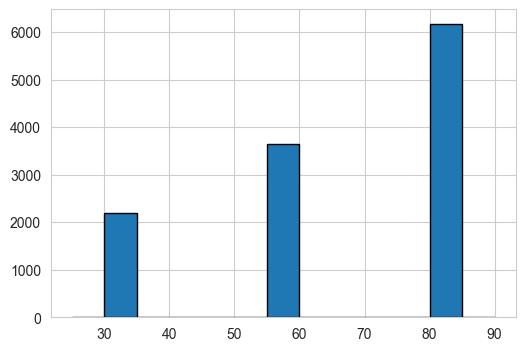

In [176]:
plt.figure(figsize=(6,4))
_=plt.hist(data["temperature"], bins=[25,30,35,40,45,50,55,60,65,70,75,80,85,90], edgecolor='black')
plt.savefig(r'images\tempHist.png')

<span style="font-size: 40px; color: green;font-family: 'Times New Roman', Times, serif;">Investigating the bar Coupons</span>
<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">1.Create a new dataFrame that contains just the bar coupons.</span> 

In [95]:
df_barCouponsOnly = data.query('coupon =="Bar"')
df_barCouponsOnly

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,coffee_house,carry_away,restaurant_under_20,restaurant_20_50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,coupon_accepted
24,No Urgent Place,Friend(s),Sunny,80,10,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,18,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,18,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,22,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,22,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,18,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">2.What proportion of bar coupons were accepted?</span> 

In [96]:
df_acceptedbarCoupons = data.query('coupon=="Bar"') 
df_acceptedbarCoupons['coupon_accepted'].mean()  
print(f"Proportion of accepted bar coupons is {df_acceptedbarCoupons['coupon_accepted'].mean()}")

Proportion of accepted bar coupons is 0.4118572927597062


<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.</span>  


bar1To3 is :0.65
bar4To8 is :0.78
bargt8  is: 0.72


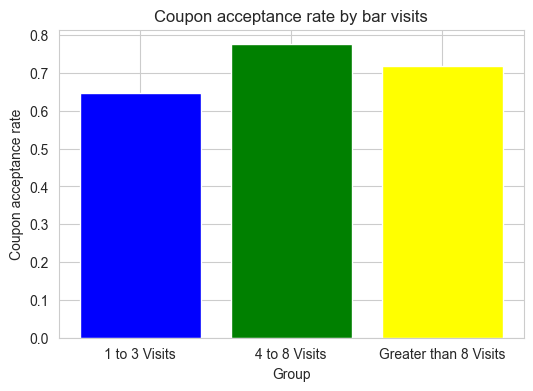

In [184]:
df_bar1To3AcceptanceRate= data.query('bar=="1~3" and coupon =="Bar"')['coupon_accepted'].mean()
df_bar4To8AcceptanceRate= data.query('bar=="4~8" and coupon =="Bar"')['coupon_accepted'].mean()
df_bargt8AcceptanceRate= data.query('bar=="gt8" and coupon =="Bar"')['coupon_accepted'].mean()
print(f"bar1To3 is :{df_bar1To3AcceptanceRate:.2f}\nbar4To8 is :{df_bar4To8AcceptanceRate:.2f}\nbargt8  is: {df_bargt8AcceptanceRate:.2f}")

rates = [df_bar1To3AcceptanceRate, df_bar4To8AcceptanceRate, df_bargt8AcceptanceRate]
group_labels = ['1 to 3 Visits', '4 to 8 Visits', 'Greater than 8 Visits']

plt.figure(figsize=(6,4))
plt.bar(group_labels, rates, color=['blue','green','yellow'] )
plt.title ('Coupon acceptance rate by bar visits')
plt.xlabel('Group')
plt.ylabel('Coupon acceptance rate')

plt.show()
plt.savefig('images\\Bar_LessThan3_vs_Others.png')
plt.close()

<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?</span>  


Bar visits for more than once and age is >25 is :0.69
Rest of the data is :0.56


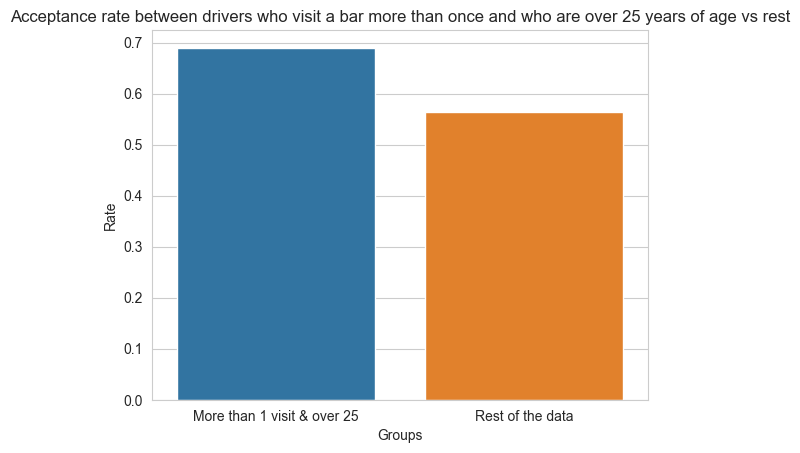

In [182]:
# The below snippet extracts a dataframe from master dataframe where coupon=bar, bar visits are at least once/month and age >25
df_barMoreThan1Visit_Over25_Cnts = data.query('(bar== "1~3" or bar== "4~8" or bar== "gt8") and (age > 25)  and (coupon=="Bar")')  
df_barMoreThan1Visit_Over25_Cnts["coupon_accepted"].mean()

# The below snippet extracts a dataframe from master dataframe that don't match the criteria (coupon=bar, bar visits are at least once/month and age >25)
df_AllOthers = data[~data.index.isin(df_barMoreThan1Visit_Over25_Cnts.index)]
df_AllOthers["coupon_accepted"].mean()

# Create a dataframe in preparation for a plot
df_plot = pd.DataFrame({'Groups': ["More than 1 visit & over 25","Rest of the data"],
                        'Rate':[df_barMoreThan1Visit_Over25_Cnts["coupon_accepted"].mean(),df_AllOthers["coupon_accepted"].mean()]
                       })

#Plot the graph
sns.barplot(data=df_plot, x="Groups", y="Rate", hue = 'Groups')
plt.title("Acceptance rate between drivers who visit a bar more than once and who are over 25 years of age vs rest");

print(f"Bar visits for more than once and age is >25 is :{df_barMoreThan1Visit_Over25_Cnts["coupon_accepted"].mean():.2f}\nRest of the data is :{df_AllOthers["coupon_accepted"].mean():.2f}")

plt.show()
plt.savefig(r'images\Bar_MoreThan1_25YO_vs_Others.jpg')
plt.close()
#---------------------------------------------------------------------------------------------------------------------------------------------
# data['is_first_group'] = (data['bar'].isin(["1~3", "4~8", "gt8"])) & (data['age'] > 25) & (data['coupon']=="bar")
# data[data['is_first_group']][['bar','coupon','age', 'coupon_accepted']]# Only bar Data = 340 rows (w/104 zeroes and 236 1s when boolean flag is applied 
# acceptance_rate_first_group = data[data['is_first_group']]['coupon_accepted'].mean()
# acceptance_rate_first_group #0.6941

<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. </span>  


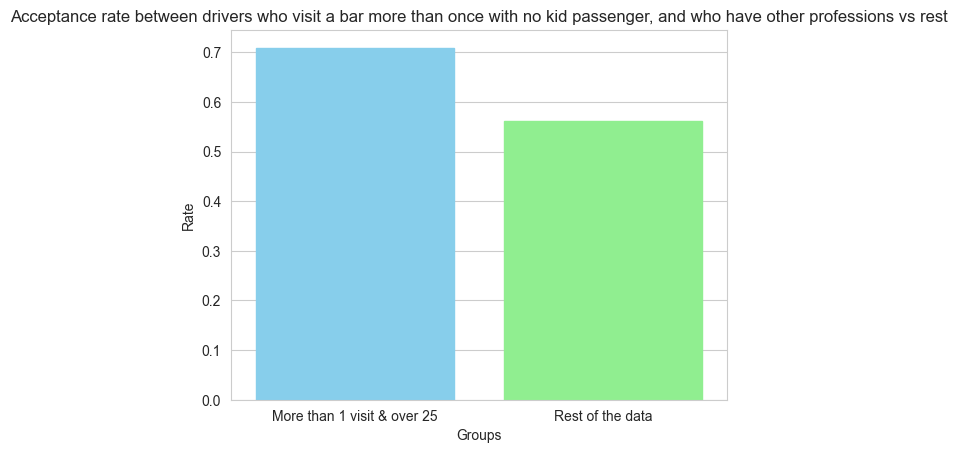

Bar visits for more than once, no kid passenger, and other profession is :0.71
Rest of the data is :0.56


In [188]:
#The below snippet extracts a dataframe from master dataframe where coupon=bar, bar visits are at least once/month, without kids as passengers, and occupation that is not Farming, Fishing, & Forestry
df_Cnts = data.query('(bar== "1~3" or bar== "4~8" or bar== "gt8") and (passenger !="Kid(s)")  and (occupation!="Farming Fishing & Forestry") and (coupon=="Bar")')  
df_Cnts["coupon_accepted"].mean()

# The below snippet extracts a dataframe from master dataframe that don't match the criteria (coupon=bar, bar visits are at least once/month without kids as passengers, and occupation that is not Farming, Fishing, & Forestry)
df_AllOthers = data[~data.index.isin(df_Cnts.index)]
df_AllOthers["coupon_accepted"].mean()

# Create a dataframe in preparation for a plot
df_plot = pd.DataFrame({'Groups': ["More than 1 visit & over 25","Rest of the data"],
                        'Rate':[df_Cnts["coupon_accepted"].mean(),df_AllOthers["coupon_accepted"].mean()]
                       }) 
#Plot the graph 
ax = sns.barplot(data=df_plot, x="Groups", y="Rate", hue = 'Groups')
colors = ["skyblue", "lightgreen"]

for bar, color in zip(ax.patches, colors):
    bar.set_color(color)
    
plt.title("Acceptance rate between drivers who visit a bar more than once with no kid passenger, and who have other professions vs rest");
plt.show()
plt.savefig(r'images\Bar_MoreThan1_NoKid_NoFarm_vs_Others.jpg')
plt.close()
print(f"Bar visits for more than once, no kid passenger, and other profession is :{df_Cnts["coupon_accepted"].mean():.2f}\nRest of the data is :{df_AllOthers["coupon_accepted"].mean():.2f}")

<div style="font-size: 20px; color: red; font-family: 'Times New Roman', Times, serif;">
6. Compare the acceptance rates between those drivers who:<br>
<ul> 
<li>go to bars more than once a month, had passengers that were not a kid, and were not widowed<br></li>
<li>go to bars more than once a month and are under the age of 30<br></li>
<li>go to cheap restaurants more than 4 times a month and income is less than 50K</li>
    </ul>
</div>


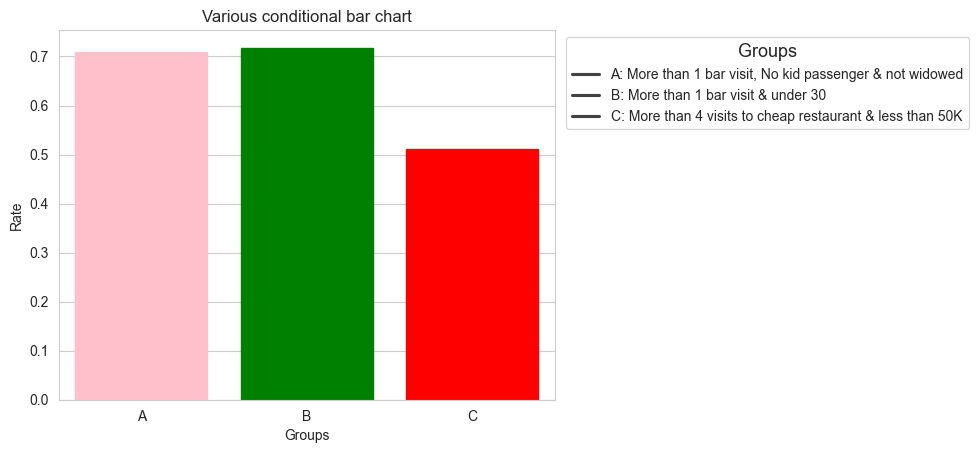

Bar visits for more than once, no kid passenger(s), and are not widowed :0.71
Bar visits for more than once and under 30 years :0.72
Cheap restaurant visits for more than 4 times and earn <$50K :0.51


In [189]:
# The below snippet extracts a dataframe from master dataframe for coupon=bar, bar visits are at least once/month or more, and not widowed
df_Cnts1 = data.query('(bar== "1~3" or bar== "4~8" or bar== "gt8") and (passenger !="Kid(s)") and (maritalStatus!="Widowed") and (coupon=="Bar")')  
df_Cnts1["coupon_accepted"].mean()

# The below snippet extracts a dataframe from master dataframe for coupon=bar, bar visits are at least once/month or more, and under 30
df_Cnts2 = data.query('(bar== "1~3" or bar== "4~8" or bar== "gt8") and (passenger !="Kid(s)") and (age<30) and (coupon=="Bar")')  
df_Cnts2["coupon_accepted"].mean()

# The below snippet extracts a dataframe from master dataframe for cheap restaurant visits for at least 4 times/month or more, and income <$50K
df_Cnts3 = data.query('(restaurant_under_20 == "4~8" or restaurant_under_20 == "gt8") and (income=="$37500 - $49999") and (coupon=="Bar")')
df_Cnts3["coupon_accepted"].mean()


# Create a dataframe in preparation for a plot
df_plot = pd.DataFrame({'Groups':["A","B","C"],
                        'Rate':[df_Cnts1["coupon_accepted"].mean(),df_Cnts2["coupon_accepted"].mean(),df_Cnts3["coupon_accepted"].mean()]
                       }) 

#Plot the graph 
ax = sns.barplot(data=df_plot, x="Groups", y="Rate", hue = 'Groups')
colors = ["Pink", "green", "red"]

for bar, color in zip(ax.patches, colors):
    bar.set_color(color)  
plt.title("Various conditional bar chart")

legend_labels = ['A: More than 1 bar visit, No kid passenger & not widowed',
                 'B: More than 1 bar visit & under 30',
                 'C: More than 4 visits to cheap restaurant & less than 50K']
plt.legend(legend_labels, title="Groups", title_fontsize='13', loc='upper right', bbox_to_anchor=(1.85, 1));

plt.show()
plt.savefig(r'images\Bar_Various.jpg')
plt.close()
print(f"Bar visits for more than once, no kid passenger(s), and are not widowed :{df_Cnts1["coupon_accepted"].mean():.2f}\nBar visits for more than once and under 30 years :{df_Cnts2["coupon_accepted"].mean():.2f}\nCheap restaurant visits for more than 4 times and earn <$50K :{df_Cnts3["coupon_accepted"].mean():.2f}")

<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons? </span>  

1. Overall, drivers that go to a bar for more than 3 times a month are more likely to accept the coupon.
2. Younger drivers (between 25 and 30) are also likely to accept coupons.
3. Equally likely are drivers who frequent a bar more than 8 times in a month.

### Independent Investigation
Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">1. Coupon acceptance across occupations</span> 

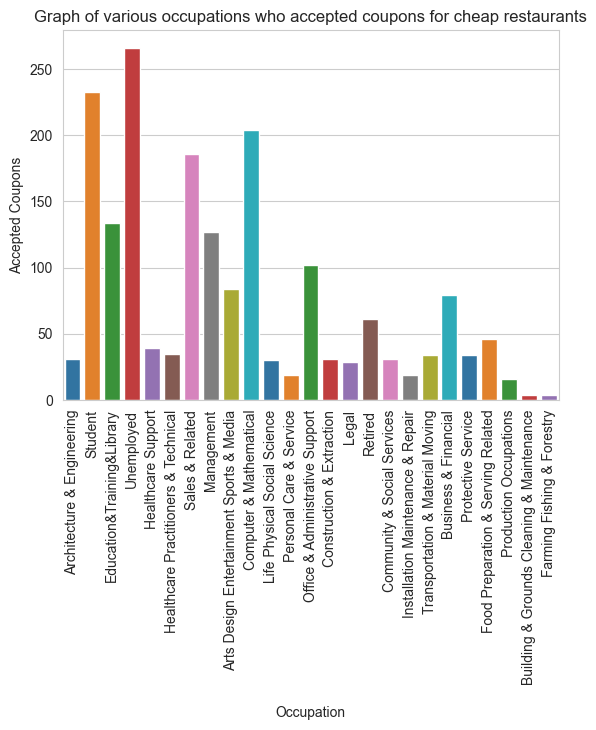

In [195]:
data_Rest20 = data.query("coupon == 'Restaurant(<20)'")
accepted_coupons = data_Rest20[data_Rest20['coupon_accepted'] == 1]

# Create the count plot
_=sns.countplot(x='occupation', data=accepted_coupons, palette='tab10',hue='occupation')

# Customize the plot
plt.title('Graph of various occupations who accepted coupons for cheap restaurants')
plt.xlabel('Occupation', labelpad=15)
plt.ylabel('Accepted Coupons')
plt.xticks(rotation=90,ha="center")  # Rotate x-axis labels for better readability if needed
 
plt.show()
plt.savefig(r'images\Coupons_Professions.jpg')
plt.close()


<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">2. Compare coupon acceptance count among the unemployed with various marital status </span>

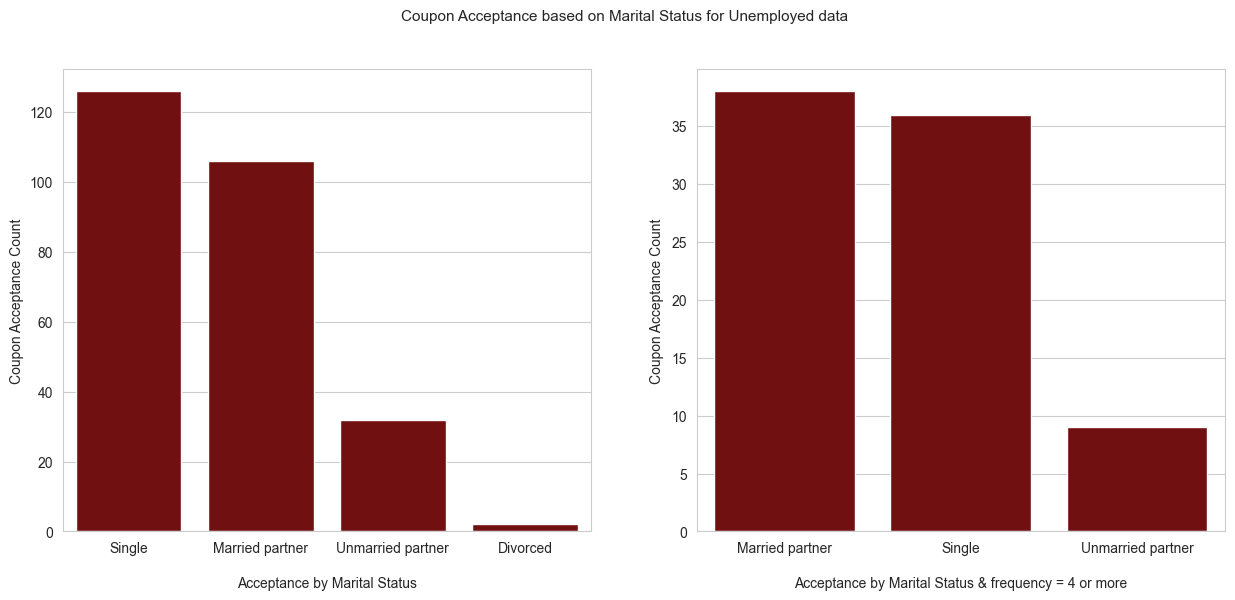

In [170]:
df1_q2 = data_Rest20.query('occupation == "Unemployed" and coupon_accepted == 1 ')['maritalStatus'].value_counts().reset_index()
df1_q2.columns =['Marital Status','Count']

df2_q2 = data_Rest20.query('occupation == "Unemployed" and coupon_accepted == 1 and restaurant_under_20== "4~8"')['maritalStatus'].value_counts().reset_index()
df2_q2.columns =['Marital Status','Count']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

_=sns.barplot(data= df1_q2,x='Marital Status',y='Count', color='maroon',  ax=axes[0]) 
axes[0].set_xlabel('Acceptance by Marital Status', labelpad=15)
axes[0].set_ylabel('Coupon Acceptance Count')


_=sns.barplot(data= df2_q2,x='Marital Status',y='Count', color='maroon',  ax=axes[1]) 
axes[1].set_xlabel('Acceptance by Marital Status & frequency = 4 or more', labelpad=15)
axes[1].set_ylabel('Coupon Acceptance Count', labelpad=5)

plt.suptitle('Coupon Acceptance based on Marital Status for Unemployed data', fontsize=11) 
plt.show()
plt.savefig(r'images\Unemployed_Marital_MoreThan4.jpg')
plt.close()

<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">3. Compare coupon acceptance ratio between unemployed-single and unemployed-unmarried partner who ate more than 4 times</span> 

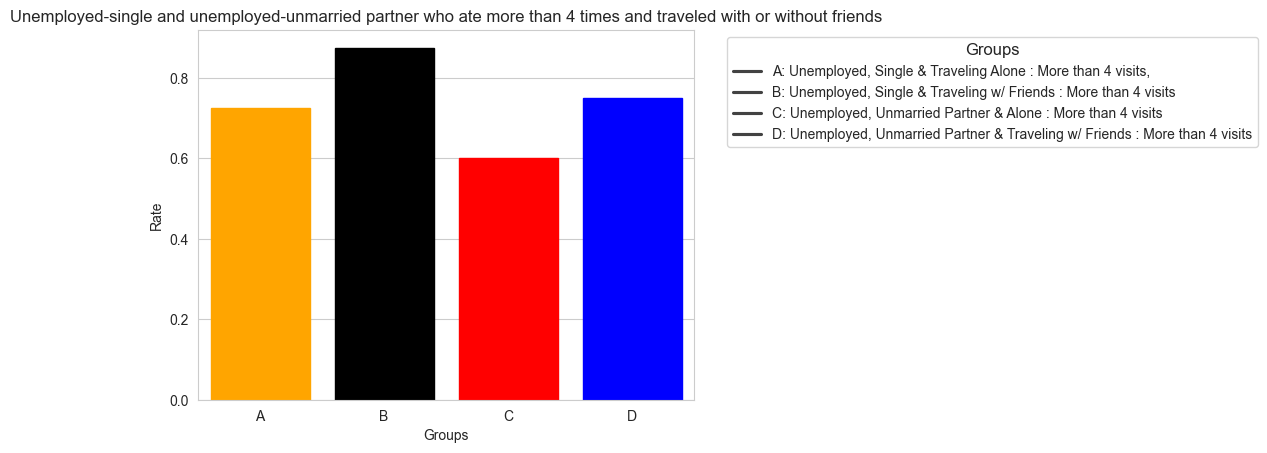

Restaurant visits more than 4 times, Unemployed, Single & Traveling Alone :0.72
Restaurant visits more than 4 times, Single & Traveling w/ Friends : More than 4 visits  :0.88
Restaurant visits more than 4 times, Unemployed, Unmarried Partner & Alone  :0.60
Restaurant visits more than 4 times, Unemployed, Unmarried Partner & Traveling w/ Friends :0.75


In [196]:
# The below snippet extracts data for all unemployed single who travel alone and go eat at restaurant more than 4 times
df1_Q3 = data_Rest20.query('(occupation=="Unemployed") and (restaurant_under_20== "4~8") and (passenger =="Alone") and (maritalStatus =="Single")')  
df1_Q3["coupon_accepted"].mean() 

# The below snippet extracts data for all unemployed single who travel with friends and go eat at restaurant more than 4 times
df2_Q3 = data_Rest20.query('(occupation=="Unemployed") and (restaurant_under_20== "4~8") and (passenger =="Friend(s)") and (maritalStatus =="Single")')  
df2_Q3["coupon_accepted"].mean() 

# The below snippet extracts data for all unemployed with an unmarried partner who travel alone and go eat at restaurant more than 4 times
df3_Q3 = data_Rest20.query('(occupation=="Unemployed") and (restaurant_under_20== "4~8") and (passenger =="Alone") and (maritalStatus =="Unmarried partner")')  
df3_Q3["coupon_accepted"].mean()

# The below snippet extracts data for all unemployed with an unmarried partner who travel with friends and go eat at restaurant more than 4 times
df4_Q3 = data_Rest20.query('(occupation=="Unemployed") and (restaurant_under_20== "4~8") and (passenger =="Friend(s)") and (maritalStatus =="Unmarried partner")')  
df4_Q3["coupon_accepted"].mean()


# Create a dataframe in preparation for a plot
df_plot = pd.DataFrame({'Groups':["A","B","C","D"],
                        'Rate':[df1_Q3["coupon_accepted"].mean(),df2_Q3["coupon_accepted"].mean(),df3_Q3["coupon_accepted"].mean(),df4_Q3["coupon_accepted"].mean()]
                       }) 

#Plot the graph 
ax = sns.barplot(data=df_plot, x="Groups", y="Rate", hue = 'Groups')
colors = ["orange", "black", "red","blue"]

for bar, color in zip(ax.patches, colors):
    bar.set_color(color)  
plt.title("Unemployed-single and unemployed-unmarried partner who ate more than 4 times and traveled with or without friends")

legend_labels = ['A: Unemployed, Single & Traveling Alone : More than 4 visits, ',
                 'B: Unemployed, Single & Traveling w/ Friends : More than 4 visits',
                 'C: Unemployed, Unmarried Partner & Alone : More than 4 visits',
                 'D: Unemployed, Unmarried Partner & Traveling w/ Friends : More than 4 visits']
plt.legend(legend_labels, title="Groups", title_fontsize='12', loc='upper right', bbox_to_anchor=(2.15, 1));

plt.show()
plt.savefig(r'images\Unemployed_Unmarried_Various.jpg')
plt.close()

print(f"Restaurant visits more than 4 times, Unemployed, Single & Traveling Alone :{df1_Q3["coupon_accepted"].mean():.2f}\n"
      f"Restaurant visits more than 4 times, Single & Traveling w/ Friends : More than 4 visits  :{df2_Q3["coupon_accepted"].mean():.2f}\n"
      f"Restaurant visits more than 4 times, Unemployed, Unmarried Partner & Alone  :{df3_Q3["coupon_accepted"].mean():.2f}\n"
      f"Restaurant visits more than 4 times, Unemployed, Unmarried Partner & Traveling w/ Friends :{df4_Q3["coupon_accepted"].mean():.2f}")


<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">4. Is someone who works in Farming, Fishing, and Forestry likely to buy cheap restaurant coupon?</span>

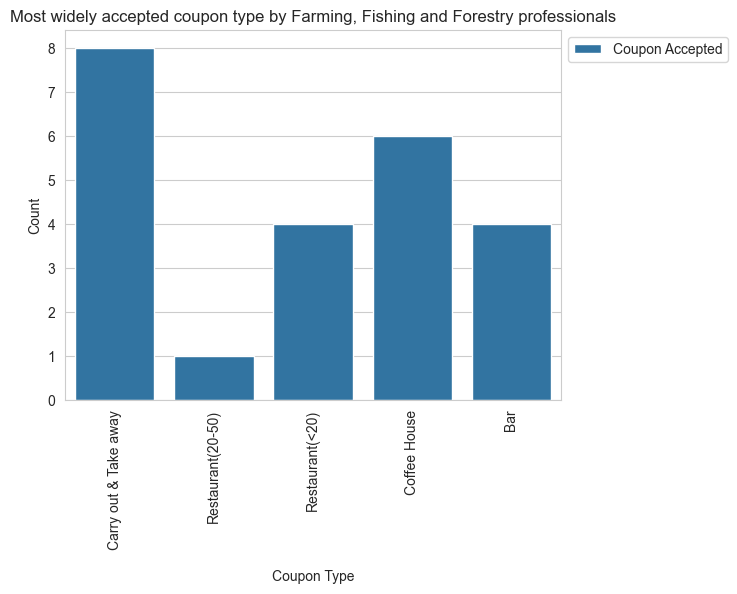

In [198]:
df1_Q4 = data.query('occupation == "Farming Fishing & Forestry" and coupon_accepted==1')
 
_=sns.countplot(df1_Q4, x='coupon', hue='coupon_accepted')
plt.title('Most widely accepted coupon type by Farming, Fishing and Forestry professionals')
plt.xlabel('Coupon Type',labelpad=15 )
plt.ylabel('Count')
plt.xticks(rotation=90, ha="center")
legend_labels = ['Coupon Accepted']
plt.legend(legend_labels,loc='upper right', bbox_to_anchor=(1.35, 1)) 
plt.show()
plt.savefig(r'images\FFF_Coupons.jpg')
plt.close()

<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">5. My hypothesis on coupon acceptance for a cheap restaurant</span>

1. Of all those who accepted cheap restaurant coupons, unemployed people and students are the biggest chunk.
2. Among the unemployed lot, the divorced is the least likely to accept a cheap restaurant coupon while both single and married are most likely to accept a coupon.
3. Those who are single and traveling with a friend are the biggest chunk who accepts coupons
4. I examined that those working in Farming, fishing, and forestry are more likely to buy takeouts than they sit at a restaurant. This could be due to various factors such as remote locations, work schedule, and other cost considerations.